Importing the Dependencies

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score



Data Collection and Processing

In [13]:
admission_dataset = pd.read_csv(r'C:\Users\LENOVO\LinearRegressionTillCloud/Admission_Prediction.csv')

In [14]:

admission_dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [15]:
admission_dataset.shape

(500, 9)

In [16]:
admission_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [17]:
admission_dataset.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='mean')
X1=admission_dataset[["GRE Score","TOEFL Score","University Rating"]]
X = imputer.fit_transform(X1)

In [22]:
X

array([[337.        , 118.        ,   4.        ],
       [324.        , 107.        ,   4.        ],
       [316.55876289, 104.        ,   3.        ],
       ...,
       [330.        , 120.        ,   5.        ],
       [312.        , 103.        ,   4.        ],
       [327.        , 113.        ,   4.        ]])

In [23]:
print("Missing values after imputation:")
print(np.isnan(X).sum())

Missing values after imputation:
0


Splitting the data and Target

In [24]:
X = admission_dataset.drop(columns=['Chance of Admit'])
Y = admission_dataset['Chance of Admit']

In [25]:
print(X)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1      337.0        118.0                4.0  4.5  4.5  9.65   
1             2      324.0        107.0                4.0  4.0  4.5  8.87   
2             3        NaN        104.0                3.0  3.0  3.5  8.00   
3             4      322.0        110.0                3.0  3.5  2.5  8.67   
4             5      314.0        103.0                2.0  2.0  3.0  8.21   
..          ...        ...          ...                ...  ...  ...   ...   
495         496      332.0        108.0                5.0  4.5  4.0  9.02   
496         497      337.0        117.0                5.0  5.0  5.0  9.87   
497         498      330.0        120.0                5.0  4.5  5.0  9.56   
498         499      312.0        103.0                4.0  4.0  5.0  8.43   
499         500      327.0        113.0                4.0  4.5  4.5  9.04   

     Research  
0           1  
1           1  
2           1  

In [26]:
print(Y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64


Splitting Training and Test data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model Training

1. Linear Regression

In [29]:
linear_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('linear_regression', LinearRegression())
])

In [30]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [31]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('linear_regression', LinearRegression())])

In [32]:
y_pred_linear = linear_pipeline.predict(X_test)

Model Evaluation

In [33]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred_linear)

In [34]:
print(f"Linear Regression: MSE = {mse_linear}, RMSE = {rmse_linear}, R² = {r2_linear}")


Linear Regression: MSE = 0.0035040547410037527, RMSE = 0.05919505672776868, R² = 0.828652579902017


Visualize the actual prices and Predicted prices

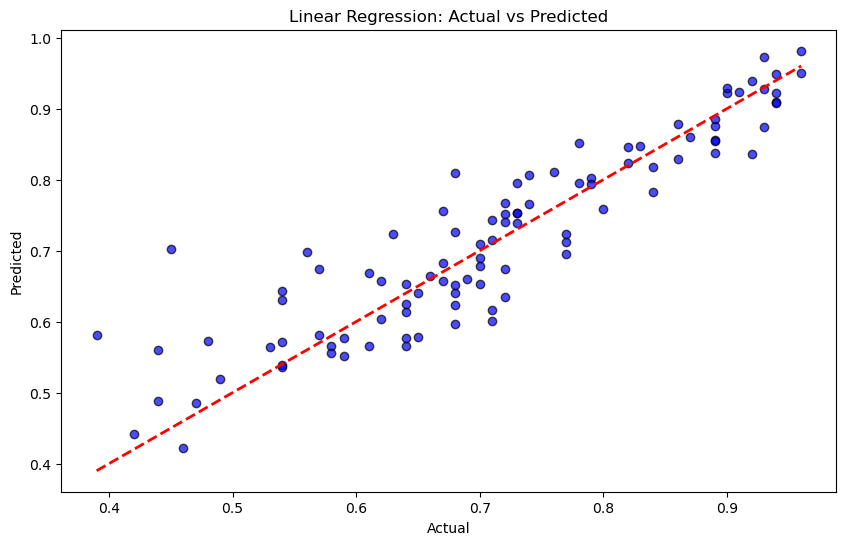

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


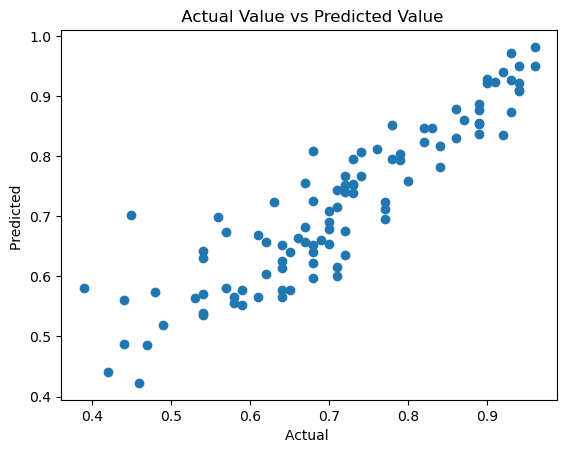

In [37]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title(" Actual Value vs Predicted Value")
plt.show()

2. Lasso Regression

In [49]:
lass_reg_model = Lasso()

In [50]:
lasso_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('lasso_regression', Lasso(alpha=0.1))
])

In [51]:
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('lasso_regression', Lasso(alpha=0.1))])

In [52]:
y_pred_lasso = lasso_pipeline.predict(X_test)


Model Evaluation

In [53]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

In [54]:
print(f"Lasso Regression: MSE = {mse_lasso}, RMSE = {rmse_lasso}, R² = {r2_lasso}")


Lasso Regression: MSE = 0.007528150232350637, RMSE = 0.08676491360193149, R² = 0.6318752942615826


Visualize the actual prices and Predicted prices

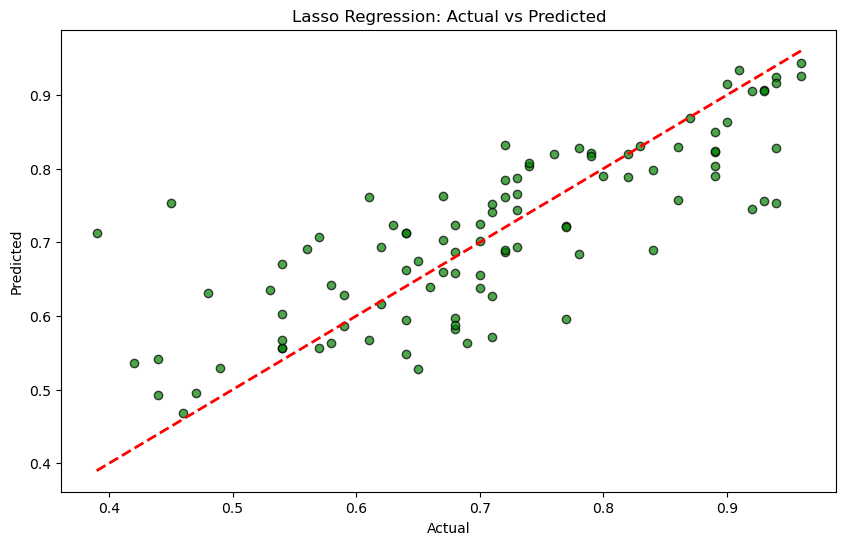

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()

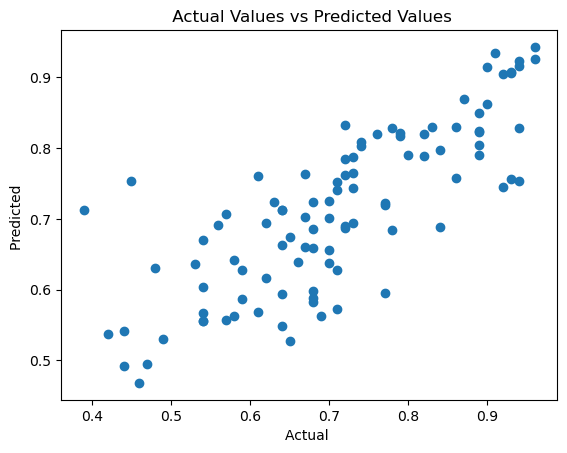

In [56]:
plt.scatter(y_test,y_pred_lasso )
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title(" Actual Values vs Predicted Values")
plt.show()